# Plot results

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

### llama-3B

In [16]:
llama_results = pd.read_csv('../csvs/llama_results.csv')

In [17]:
llama_results.head(n=3)

,questions,llama_base_output,helper_output,cancer_entities,gene_entities,mutation_entities,modified_prompt,ground_truth_stat,llama_base_stat,delta_llama,final_response,intent
0,What is the frequency of somatic JAK2 heterozy...,The final answer is: 0.5%,['The frequency of JAK2 Loss in TARGET-ALL-P2 ...,['TARGET-ALL-P2'],['JAK2'],[],What is the frequency of somatic JAK2 heterozy...,15.02,0.50,-14.52,The final answer is: 15.02%,freq_cnv_loss_or_gain
1,What is the frequency of somatic JAK2 heterozy...,The final answer is: 12.5%,['The frequency of JAK2 Loss in MP2PRT-ALL is ...,['MP2PRT-ALL'],['JAK2'],[],What is the frequency of somatic JAK2 heterozy...,8.91,12.50,3.59,The final answer is: 8.91%,freq_cnv_loss_or_gain
2,What is the frequency of somatic JAK2 heterozy...,The final answer is: 0.01%,['The frequency of JAK2 Loss in TCGA-DLBC is 8...,['TCGA-DLBC'],['JAK2'],[],What is the frequency of somatic JAK2 heterozy...,8.33,0.01,-8.32,The final answer is: 8.33%,freq_cnv_loss_or_gain


In [18]:
llama_results.shape

(6011, 12)

In [19]:
llama_results.columns

Index(['questions', 'llama_base_output', 'helper_output', 'cancer_entities',
       'gene_entities', 'mutation_entities', 'modified_prompt',
       'ground_truth_stat', 'llama_base_stat', 'delta_llama', 'final_response',
       'intent'],
      dtype='object')

### GPT-4o
- around 825k tokens analyzed, total ~ $20

In [20]:
gpt_4o_results = pd.read_csv('../csvs/gpt4o_results.csv')

In [21]:
gpt_4o_results.head(n=2)

,questions,gpt4_base_output,helper_output,cancer_entities,gene_entities,mutation_entities,modified_prompt,ground_truth_stat,gpt4_base_stat,delta_gpt4,final_response,intent
0,What is the frequency of somatic JAK2 heterozy...,The final answer is: 0.5%,['The frequency of JAK2 Loss in TARGET-ALL-P2 ...,['TARGET-ALL-P2'],['JAK2'],[],What is the frequency of somatic JAK2 heterozy...,15.02,0.5,-14.52,The final answer is: 15.02%,freq_cnv_loss_or_gain
1,What is the frequency of somatic JAK2 heterozy...,The final answer is: 0.5%,['The frequency of JAK2 Loss in MP2PRT-ALL is ...,['MP2PRT-ALL'],['JAK2'],[],What is the frequency of somatic JAK2 heterozy...,8.91,0.5,-8.41,The final answer is: 8.91%,freq_cnv_loss_or_gain


In [22]:
gpt_4o_results.shape

(6011, 12)

### Qwen-4B

In [23]:
qwen_results = pd.read_csv('../csvs/qwen_results.csv')

In [24]:
qwen_results.head(n=2)

,questions,qwen_base_output,helper_output,cancer_entities,gene_entities,mutation_entities,modified_prompt,ground_truth_stat,qwen_base_stat,delta_qwen,final_response,intent
0,What is the frequency of somatic JAK2 heterozy...,The final answer is: 0.15%,['The frequency of JAK2 Loss in TARGET-ALL-P2 ...,['TARGET-ALL-P2'],['JAK2'],[],What is the frequency of somatic JAK2 heterozy...,15.02,0.15,-14.87,The final answer is: 15.02%,freq_cnv_loss_or_gain
1,What is the frequency of somatic JAK2 heterozy...,The final answer is: 0.15%,['The frequency of JAK2 Loss in MP2PRT-ALL is ...,['MP2PRT-ALL'],['JAK2'],[],What is the frequency of somatic JAK2 heterozy...,8.91,0.15,-8.76,The final answer is: 8.91%,freq_cnv_loss_or_gain


## Combine all data for plotting

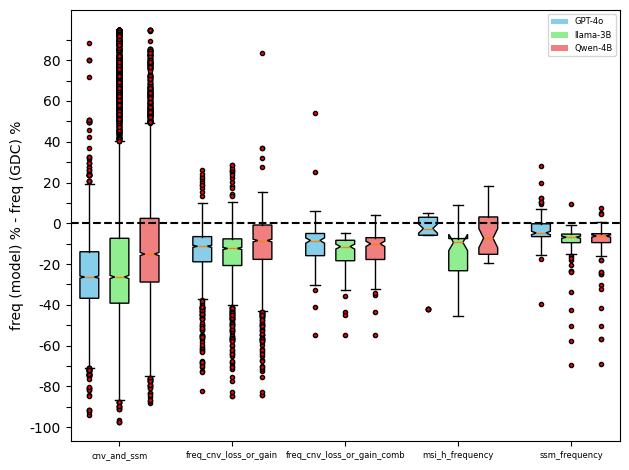

In [25]:
fig, ax = plt.subplots()
flier_props = dict(marker='o', markerfacecolor='red', markersize=3, linestyle='none')

grouped_gpt4_data = gpt_4o_results.groupby('intent')['delta_gpt4'].apply(list)
grouped_llama_data = llama_results.groupby('intent')['delta_llama'].apply(list)
grouped_qwen_data = qwen_results.groupby('intent')['delta_qwen'].apply(list)

n = len(grouped_gpt4_data)
xlabels = list(grouped_gpt4_data.groupby('intent').groups.keys())
positions_gpt4 = np.arange(n) * 3
positions_llama = positions_gpt4 + 0.8
positions_qwen = positions_llama + 0.8

ax.boxplot(
    grouped_gpt4_data, positions=positions_gpt4,
    notch=True, flierprops=flier_props, patch_artist=True, boxprops=dict(facecolor='skyblue'),
    showmeans=False
)
ax.boxplot(
    grouped_llama_data, positions=positions_llama,
    notch=True, flierprops=flier_props, patch_artist=True, boxprops=dict(facecolor='lightgreen'),
    showmeans=False
)
ax.boxplot(
    grouped_qwen_data, positions=positions_qwen,
    notch=True, flierprops=flier_props, patch_artist=True, boxprops=dict(facecolor='lightcoral'),
    showmeans=False
)


# x-axis ticks
all_positions = (positions_gpt4 + positions_llama + positions_qwen) / 3
ax.set_xticks(all_positions)
ax.set_xticklabels(xlabels, fontsize=6)

# yticks
yticks = np.arange(-100,100,10)
ax.set_yticks(yticks)
ytick_labels = [str(t) if t % 20 == 0 else '' for t in yticks]
ax.set_yticklabels(ytick_labels)

# ylabel
ax.set_ylabel('freq (model) % - freq (GDC) %')
ax.axhline(y=0, color='black', linestyle='--')

plt.tight_layout()
plt.title('')

# legend
legend_elements = [
    Patch(facecolor='skyblue', label='GPT-4o'),
    Patch(facecolor='lightgreen', label='llama-3B'),
    Patch(facecolor='lightcoral', label='Qwen-4B'),
]
ax.legend(handles=legend_elements, loc='best', fontsize=6)
plt.show()


### Plot with significance values

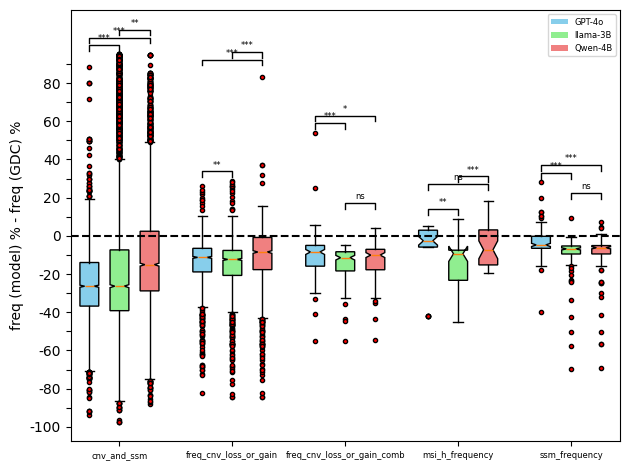

In [26]:
# spacing parameters
line_height = 3  # height of the vertical brackets
text_offset = 1  # how much higher the star goes above the bracket

from matplotlib.patches import Patch
from scipy.stats import ttest_ind

fig, ax = plt.subplots()
flier_props = dict(marker='o', markerfacecolor='red', markersize=3, linestyle='none')

grouped_gpt4_data = gpt_4o_results.groupby('intent')['delta_gpt4'].apply(list)
grouped_llama_data = llama_results.groupby('intent')['delta_llama'].apply(list)
grouped_qwen_data = qwen_results.groupby('intent')['delta_qwen'].apply(list)

n = len(grouped_gpt4_data)
xlabels = list(grouped_gpt4_data.groupby('intent').groups.keys())
positions_gpt4 = np.arange(n) * 3
positions_llama = positions_gpt4 + 0.8
positions_qwen = positions_llama + 0.8

ax.boxplot(
    grouped_gpt4_data, positions=positions_gpt4,
    notch=True, flierprops=flier_props, patch_artist=True, boxprops=dict(facecolor='skyblue'),
    showmeans=False
)
ax.boxplot(
    grouped_llama_data, positions=positions_llama,
    notch=True, flierprops=flier_props, patch_artist=True, boxprops=dict(facecolor='lightgreen'),
    showmeans=False
)
ax.boxplot(
    grouped_qwen_data, positions=positions_qwen,
    notch=True, flierprops=flier_props, patch_artist=True, boxprops=dict(facecolor='lightcoral'),
    showmeans=False
)


# x-axis ticks
all_positions = (positions_gpt4 + positions_llama + positions_qwen) / 3
ax.set_xticks(all_positions)
ax.set_xticklabels(xlabels, fontsize=6)

# yticks
yticks = np.arange(-100,100,10)
ax.set_yticks(yticks)
ytick_labels = [str(t) if t % 20 == 0 else '' for t in yticks]
ax.set_yticklabels(ytick_labels)

# ylabel
ax.set_ylabel('freq (model) % - freq (GDC) %')
ax.axhline(y=0, color='black', linestyle='--')


# Add significance stars inside plot
for i, intent in enumerate(xlabels):
    gpt_vals = grouped_gpt4_data[intent]
    llama_vals = grouped_llama_data[intent]
    qwen_vals = grouped_qwen_data[intent]

    # Compare GPT-4o vs LLaMA
    stat, p = ttest_ind(gpt_vals, llama_vals, equal_var=False)
    if p < 0.001:
        sig = '***'
    elif p < 0.01:
        sig = '**'
    elif p < 0.05:
        sig = '*'
    else:
        sig = 'ns'
    y = max(max(gpt_vals), max(llama_vals)) + 2
    x1, x2 = positions_gpt4[i], positions_llama[i]
    ax.plot([x1, x1, x2, x2], [y, y + line_height, y + line_height, y], color='black', lw=1)
    ax.text((x1 + x2) / 2, y + line_height + text_offset, sig, ha='center', va='bottom', fontsize=6)

    # Compare GPT-4o vs Qwen
    stat, p = ttest_ind(gpt_vals, qwen_vals, equal_var=False)
    sig = '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else 'ns'
    y = max(max(gpt_vals), max(qwen_vals)) + 6
    x1, x2 = positions_gpt4[i], positions_qwen[i]
    ax.plot([x1, x1, x2, x2], [y, y + line_height, y + line_height, y], color='black', lw=1)
    ax.text((x1 + x2) / 2, y + line_height + text_offset, sig, ha='center', va='bottom', fontsize=6)
    

    # Compare LLaMA vs Qwen
    stat, p = ttest_ind(llama_vals, qwen_vals, equal_var=False)
    sig = '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else 'ns'
    y = max(max(llama_vals), max(qwen_vals)) + 10
    x1, x2 = positions_llama[i], positions_qwen[i]
    ax.plot([x1, x1, x2, x2], [y, y + line_height, y + line_height, y], color='black', lw=1)
    ax.text((x1 + x2) / 2, y + line_height + text_offset, sig, ha='center', va='bottom', fontsize=6)


# Legend
legend_elements = [
    Patch(facecolor='skyblue', label='GPT-4o'),
    Patch(facecolor='lightgreen', label='llama-3B'),
    Patch(facecolor='lightcoral', label='Qwen-4B'),
]
ax.legend(handles=legend_elements, loc='best', fontsize=6)

plt.tight_layout()
plt.title('')
plt.savefig('../figs/Fig2.png', bbox_inches='tight')

### Distribution of ground truth stats

In [27]:
llama_results.groupby('intent')['ground_truth_stat'].describe()

,count,mean,std,min,25%,50%,75%,max
intent,,,,,,,,
cnv_and_ssm,4206.0,32.878766,17.667840,5.0,20.00,31.560,43.6400,97.33
freq_cnv_loss_or_gain,1453.0,17.207268,12.157665,5.0,8.43,13.640,21.8200,84.54
freq_cnv_loss_or_gain_comb,170.0,14.139412,8.402666,5.0,8.34,11.445,18.3725,55.00
msi_h_frequency,38.0,20.086579,11.679103,7.5,9.38,18.150,25.6400,45.31
ssm_frequency,144.0,10.285764,10.264880,5.0,5.56,6.990,10.1475,69.59


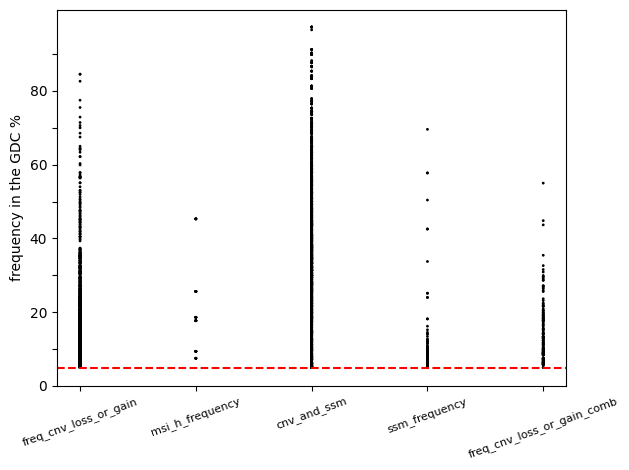

In [28]:
fig, ax = plt.subplots()
ax.scatter(
    y='ground_truth_stat', x='intent', data=llama_results,
    color='skyblue', marker='o', facecolors='none', edgecolors='black', s=1
)
xlabels = llama_results['intent'].unique()
plt.tick_params(axis='x', labelsize=8)
locs, labels = plt.xticks()
plt.xticks(np.arange(5), xlabels, rotation=20)
plt.ylabel('frequency in the GDC %')
plt.axhline(y=5, color='red', linestyle='--' )
plt.title('')

# yticks
yticks = np.arange(0,100,10)
ax.set_yticks(yticks)
ytick_labels = [str(t) if t % 20 == 0 else '' for t in yticks]
ax.set_yticklabels(ytick_labels)

plt.tight_layout()
plt.title('')
plt.savefig('../figs/S1.png', bbox_inches='tight')



### Separate TCGA and non-TCGA questions

In [29]:
def return_tcga_label(x):
    if 'TCGA' in x['questions']:
        return 'TCGA'
    else:
        return 'Non-TCGA'

In [30]:
llama_results['is_tcga'] = llama_results.apply(
    lambda x: return_tcga_label(x), axis=1
)

In [31]:
gpt_4o_results['is_tcga'] = gpt_4o_results.apply(
    lambda x: return_tcga_label(x), axis=1
)

In [32]:
qwen_results['is_tcga'] = qwen_results.apply(
    lambda x: return_tcga_label(x), axis=1
)

### show TCGA and non-TCGA performance side-by-side for each LLM

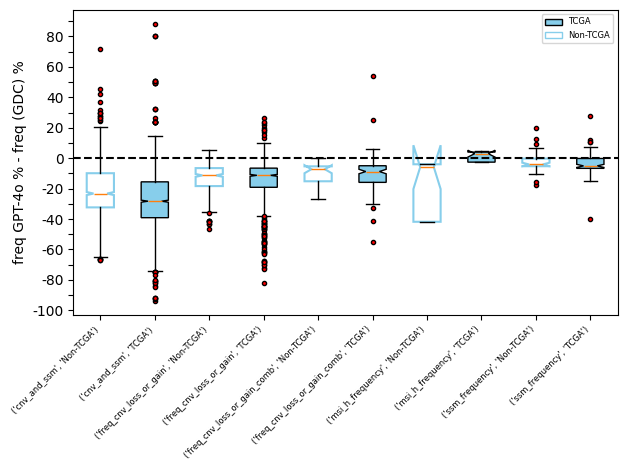

In [33]:
fig, ax = plt.subplots()
flier_props = dict(marker='o', markerfacecolor='red', markersize=3, linestyle='none')

# Grouped data
grouped_data = gpt_4o_results.groupby(['intent', 'is_tcga'])['delta_gpt4'].apply(list)

n = len(grouped_data)
xlabels = list(grouped_data.groupby(['intent', 'is_tcga']).groups.keys())
positions = np.arange(n)

# Boxplot with patch_artist=True to allow coloring
bp = ax.boxplot(
    grouped_data, positions=positions,
    notch=True, flierprops=flier_props,
    patch_artist=True, showmeans=False
)

# Color each box based on TCGA/Non-TCGA
for i, (patch, label) in enumerate(zip(bp['boxes'], xlabels)):
    is_tcga = label[1]  # the second item in tuple
    if is_tcga == 'TCGA':
        patch.set_facecolor('skyblue')
        patch.set_edgecolor('black')
    else:  # Non-TCGA
        patch.set_facecolor('none')            # hollow
        patch.set_edgecolor('skyblue')         # outline
        patch.set_linewidth(1.5)

# x-axis ticks
ax.set_xticks(positions)
ax.set_xticklabels(xlabels, fontsize=6, rotation=45, ha='right')

# y-axis ticks
yticks = np.arange(-100, 100, 10)
ax.set_yticks(yticks)
ytick_labels = [str(t) if t % 20 == 0 else '' for t in yticks]
ax.set_yticklabels(ytick_labels)

# Labels and baseline
ax.set_ylabel('freq GPT-4o % - freq (GDC) %')
ax.axhline(y=0, color='black', linestyle='--')

# Legend
legend_elements = [
    Patch(facecolor='skyblue', edgecolor='black', label='TCGA'),
    Patch(facecolor='none', edgecolor='skyblue', label='Non-TCGA')
]
ax.legend(handles=legend_elements, loc='best', fontsize=6)

plt.tight_layout()
plt.title('')
plt.show()

### add significance values to above plot

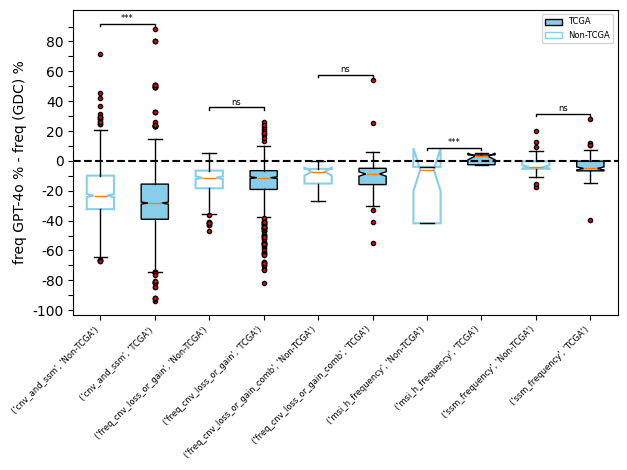

In [34]:
fig, ax = plt.subplots()
flier_props = dict(marker='o', markerfacecolor='red', markersize=3, linestyle='none')

# Grouped data
grouped_data = gpt_4o_results.groupby(['intent', 'is_tcga'])['delta_gpt4'].apply(list)

n = len(grouped_data)
xlabels = list(grouped_data.groupby(['intent', 'is_tcga']).groups.keys())
positions = np.arange(n)

# Boxplot with patch_artist=True to allow coloring
bp = ax.boxplot(
    grouped_data, positions=positions,
    notch=True, flierprops=flier_props,
    patch_artist=True, showmeans=False
)

# Color each box based on TCGA/Non-TCGA
for i, (patch, label) in enumerate(zip(bp['boxes'], xlabels)):
    is_tcga = label[1]  # the second item in tuple
    if is_tcga == 'TCGA':
        patch.set_facecolor('skyblue')
        patch.set_edgecolor('black')
    else:  # Non-TCGA
        patch.set_facecolor('none')            # hollow
        patch.set_edgecolor('skyblue')         # outline
        patch.set_linewidth(1.5)

# x-axis ticks
ax.set_xticks(positions)
ax.set_xticklabels(xlabels, fontsize=6, rotation=45, ha='right')

# y-axis ticks
yticks = np.arange(-100, 100, 10)
ax.set_yticks(yticks)
ytick_labels = [str(t) if t % 20 == 0 else '' for t in yticks]
ax.set_yticklabels(ytick_labels)

# Labels and baseline
ax.set_ylabel('freq GPT-4o % - freq (GDC) %')
ax.axhline(y=0, color='black', linestyle='--')

# Legend
legend_elements = [
    Patch(facecolor='skyblue', edgecolor='black', label='TCGA'),
    Patch(facecolor='none', edgecolor='skyblue', label='Non-TCGA')
]
ax.legend(handles=legend_elements, loc='best', fontsize=6)

# Parameters for bracket spacing
line_height = 1.5
text_offset = 0.5
buffer_above_box = 2.0

# Create a mapping from labels to position
label_to_pos = {label: pos for label, pos in zip(xlabels, positions)}

# For each intent, compare TCGA vs Non-TCGA
used_y = []  # to stack brackets nicely

for intent in set(label[0] for label in xlabels):
    try:
        # Extract values
        tcga_vals = grouped_data[(intent, 'TCGA')]
        non_tcga_vals = grouped_data[(intent, 'Non-TCGA')]

        # Get their boxplot positions
        x1 = label_to_pos[(intent, 'TCGA')]
        x2 = label_to_pos[(intent, 'Non-TCGA')]

        # Perform t-test
        stat, p = ttest_ind(tcga_vals, non_tcga_vals, equal_var=False)
        sig = '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else 'ns'

        # Choose bracket height just above the taller box
        y_base = max(max(tcga_vals), max(non_tcga_vals)) + buffer_above_box
        # Avoid overlap with previous brackets
        while any(abs(y_base - y) < (line_height + text_offset + 1) for y in used_y):
            y_base += 2
        used_y.append(y_base)

        # Draw the bracket
        ax.plot([x1, x1, x2, x2], [y_base, y_base + line_height, y_base + line_height, y_base], color='black', lw=1)

        # Add significance stars
        ax.text((x1 + x2) / 2, y_base + line_height + text_offset, sig,
                ha='center', va='bottom', fontsize=6)

    except KeyError:
        # One of the groups is missing — skip
        continue

plt.tight_layout()
plt.title('')
plt.savefig('../figs/S2.png', bbox_inches='tight')


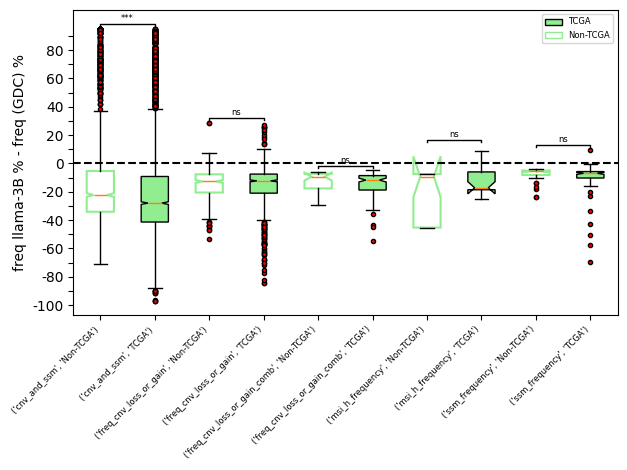

In [35]:
fig, ax = plt.subplots()
flier_props = dict(marker='o', markerfacecolor='red', markersize=3, linestyle='none')

# Grouped data
grouped_data = llama_results.groupby(['intent', 'is_tcga'])['delta_llama'].apply(list)

n = len(grouped_data)
xlabels = list(grouped_data.groupby(['intent', 'is_tcga']).groups.keys())
positions = np.arange(n)

# Boxplot with patch_artist=True to allow coloring
bp = ax.boxplot(
    grouped_data, positions=positions,
    notch=True, flierprops=flier_props,
    patch_artist=True, showmeans=False
)

# Color each box based on TCGA/Non-TCGA
for i, (patch, label) in enumerate(zip(bp['boxes'], xlabels)):
    is_tcga = label[1]  # the second item in tuple
    if is_tcga == 'TCGA':
        patch.set_facecolor('lightgreen')
        patch.set_edgecolor('black')
    else:  # Non-TCGA
        patch.set_facecolor('none')            # hollow
        patch.set_edgecolor('lightgreen')         # outline
        patch.set_linewidth(1.5)

# x-axis ticks
ax.set_xticks(positions)
ax.set_xticklabels(xlabels, fontsize=6, rotation=45, ha='right')

# y-axis ticks
yticks = np.arange(-100, 100, 10)
ax.set_yticks(yticks)
ytick_labels = [str(t) if t % 20 == 0 else '' for t in yticks]
ax.set_yticklabels(ytick_labels)

# Labels and baseline
ax.set_ylabel('freq llama-3B % - freq (GDC) %')
ax.axhline(y=0, color='black', linestyle='--')

# Legend
legend_elements = [
    Patch(facecolor='lightgreen', edgecolor='black', label='TCGA'),
    Patch(facecolor='none', edgecolor='lightgreen', label='Non-TCGA')
]
ax.legend(handles=legend_elements, loc='best', fontsize=6)

# Parameters for bracket spacing
line_height = 1.5
text_offset = 0.5
buffer_above_box = 2.0

# Create a mapping from labels to position
label_to_pos = {label: pos for label, pos in zip(xlabels, positions)}

# For each intent, compare TCGA vs Non-TCGA
used_y = []  # to stack brackets nicely

for intent in set(label[0] for label in xlabels):
    try:
        # Extract values
        tcga_vals = grouped_data[(intent, 'TCGA')]
        non_tcga_vals = grouped_data[(intent, 'Non-TCGA')]

        # Get their boxplot positions
        x1 = label_to_pos[(intent, 'TCGA')]
        x2 = label_to_pos[(intent, 'Non-TCGA')]

        # Perform t-test
        stat, p = ttest_ind(tcga_vals, non_tcga_vals, equal_var=False)
        sig = '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else 'ns'

        # Choose bracket height just above the taller box
        y_base = max(max(tcga_vals), max(non_tcga_vals)) + buffer_above_box
        # Avoid overlap with previous brackets
        while any(abs(y_base - y) < (line_height + text_offset + 1) for y in used_y):
            y_base += 2
        used_y.append(y_base)

        # Draw the bracket
        ax.plot([x1, x1, x2, x2], [y_base, y_base + line_height, y_base + line_height, y_base], color='black', lw=1)

        # Add significance stars
        ax.text((x1 + x2) / 2, y_base + line_height + text_offset, sig,
                ha='center', va='bottom', fontsize=6)

    except KeyError:
        # One of the groups is missing — skip
        continue

plt.tight_layout()
plt.title('')
plt.savefig('../figs/S3.png', bbox_inches='tight')


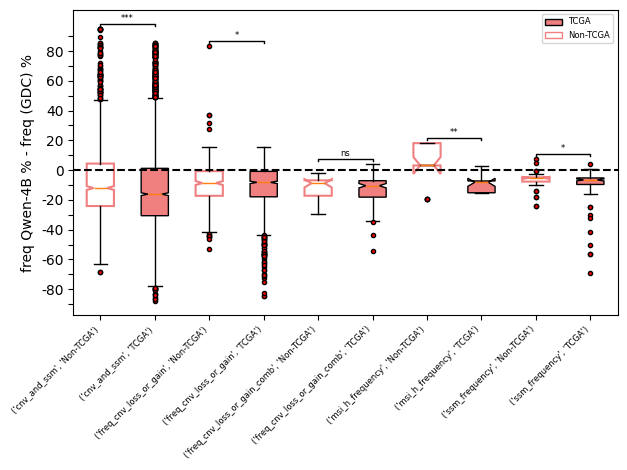

In [36]:
from scipy.stats import ttest_ind

fig, ax = plt.subplots()
flier_props = dict(marker='o', markerfacecolor='red', markersize=3, linestyle='none')

# Grouped data
grouped_data = qwen_results.groupby(['intent', 'is_tcga'])['delta_qwen'].apply(list)

n = len(grouped_data)
xlabels = list(grouped_data.groupby(['intent', 'is_tcga']).groups.keys())
positions = np.arange(n)

# Boxplot with patch_artist=True to allow coloring
bp = ax.boxplot(
    grouped_data, positions=positions,
    notch=True, flierprops=flier_props,
    patch_artist=True, showmeans=False
)

# Color each box based on TCGA/Non-TCGA
for i, (patch, label) in enumerate(zip(bp['boxes'], xlabels)):
    is_tcga = label[1]  # the second item in tuple
    if is_tcga == 'TCGA':
        patch.set_facecolor('lightcoral')
        patch.set_edgecolor('black')
    else:  # Non-TCGA
        patch.set_facecolor('none')            # hollow
        patch.set_edgecolor('lightcoral')         # outline
        patch.set_linewidth(1.5)

# x-axis ticks
ax.set_xticks(positions)
ax.set_xticklabels(xlabels, fontsize=6, rotation=45, ha='right')

# y-axis ticks
yticks = np.arange(-100, 100, 10)
ax.set_yticks(yticks)
ytick_labels = [str(t) if t % 20 == 0 else '' for t in yticks]
ax.set_yticklabels(ytick_labels)

# Labels and baseline
ax.set_ylabel('freq Qwen-4B % - freq (GDC) %')
ax.axhline(y=0, color='black', linestyle='--')

# Legend
legend_elements = [
    Patch(facecolor='lightcoral', edgecolor='black', label='TCGA'),
    Patch(facecolor='none', edgecolor='lightcoral', label='Non-TCGA')
]
ax.legend(handles=legend_elements, loc='best', fontsize=6)


# Parameters for bracket spacing
line_height = 1.5
text_offset = 0.5
buffer_above_box = 2.0

# Create a mapping from labels to position
label_to_pos = {label: pos for label, pos in zip(xlabels, positions)}

# For each intent, compare TCGA vs Non-TCGA
used_y = []  # to stack brackets nicely

for intent in set(label[0] for label in xlabels):
    try:
        # Extract values
        tcga_vals = grouped_data[(intent, 'TCGA')]
        non_tcga_vals = grouped_data[(intent, 'Non-TCGA')]

        # Get their boxplot positions
        x1 = label_to_pos[(intent, 'TCGA')]
        x2 = label_to_pos[(intent, 'Non-TCGA')]

        # Perform t-test
        stat, p = ttest_ind(tcga_vals, non_tcga_vals, equal_var=False)
        sig = '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else 'ns'

        # Choose bracket height just above the taller box
        y_base = max(max(tcga_vals), max(non_tcga_vals)) + buffer_above_box
        # Avoid overlap with previous brackets
        while any(abs(y_base - y) < (line_height + text_offset + 1) for y in used_y):
            y_base += 2
        used_y.append(y_base)

        # Draw the bracket
        ax.plot([x1, x1, x2, x2], [y_base, y_base + line_height, y_base + line_height, y_base], color='black', lw=1)

        # Add significance stars
        ax.text((x1 + x2) / 2, y_base + line_height + text_offset, sig,
                ha='center', va='bottom', fontsize=6)

    except KeyError:
        # One of the groups is missing — skip
        continue

plt.tight_layout()
plt.title('')
plt.savefig('../figs/S4.png', bbox_inches='tight')



### separate heterozygous deletions, gains and amplifications into different categories

In [37]:
def return_cnv_type(x):
    if 'heterozygous deletion' in x:
        cnv_type = 'heterozygous deletion'
    elif 'gain' in x:
        cnv_type = 'gain'
    elif 'amplification' in x:
        cnv_type = 'amplification'
    else:
        cnv_type = 'NA'
    return cnv_type

In [38]:
llama_results['cnv_type'] = llama_results['questions'].apply(return_cnv_type)
gpt_4o_results['cnv_type'] = gpt_4o_results['questions'].apply(return_cnv_type)
qwen_results['cnv_type'] = qwen_results['questions'].apply(return_cnv_type)

In [39]:
llama_cnv = llama_results[llama_results['intent'].str.contains('freq_cnv_loss')]
gpt4_cnv = gpt_4o_results[gpt_4o_results['intent'].str.contains('freq_cnv_loss')]
qwen_cnv = qwen_results[qwen_results['intent'].str.contains('freq_cnv_loss')]

In [40]:
# the two NAs are for the two homozygous deletion questions
llama_cnv['cnv_type'].value_counts()

cnv_type
heterozygous deletion    819
gain                     642
amplification            160
NA                         2
Name: count, dtype: int64

In [41]:
gpt4_cnv['cnv_type'].value_counts()

cnv_type
heterozygous deletion    819
gain                     642
amplification            160
NA                         2
Name: count, dtype: int64

In [42]:
qwen_cnv['cnv_type'].value_counts()

cnv_type
heterozygous deletion    819
gain                     642
amplification            160
NA                         2
Name: count, dtype: int64

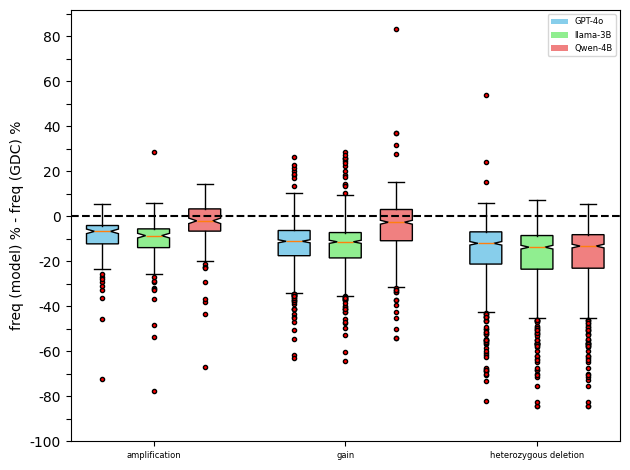

In [43]:
fig, ax = plt.subplots()
flier_props = dict(marker='o', markerfacecolor='red', markersize=3, linestyle='none')

# remove the couple of NA for hom dels
gpt4_cnv = gpt4_cnv[gpt4_cnv['cnv_type']!='NA']
llama_cnv = llama_cnv[llama_cnv['cnv_type']!='NA']
qwen_cnv = qwen_cnv[qwen_cnv['cnv_type']!='NA']

grouped_gpt4_data = gpt4_cnv.groupby('cnv_type')['delta_gpt4'].apply(list)
grouped_llama_data = llama_cnv.groupby('cnv_type')['delta_llama'].apply(list)
grouped_qwen_data = qwen_cnv.groupby('cnv_type')['delta_qwen'].apply(list)

n = len(grouped_gpt4_data)
xlabels = list(grouped_gpt4_data.groupby('cnv_type').groups.keys())
positions_gpt4 = np.arange(n) * 3
positions_llama = positions_gpt4 + 0.8
positions_qwen = positions_llama + 0.8

ax.boxplot(
    grouped_gpt4_data, positions=positions_gpt4,
    notch=True, flierprops=flier_props, patch_artist=True, boxprops=dict(facecolor='skyblue'),
    showmeans=False
)
ax.boxplot(
    grouped_llama_data, positions=positions_llama,
    notch=True, flierprops=flier_props, patch_artist=True, boxprops=dict(facecolor='lightgreen'),
    showmeans=False
)
ax.boxplot(
    grouped_qwen_data, positions=positions_qwen,
    notch=True, flierprops=flier_props, patch_artist=True, boxprops=dict(facecolor='lightcoral'),
    showmeans=False
)


# x-axis ticks
all_positions = (positions_gpt4 + positions_llama + positions_qwen) / 3
ax.set_xticks(all_positions)
ax.set_xticklabels(xlabels, fontsize=6)

# yticks
yticks = np.arange(-100,100,10)
ax.set_yticks(yticks)
ytick_labels = [str(t) if t % 20 == 0 else '' for t in yticks]
ax.set_yticklabels(ytick_labels)

# ylabel
ax.set_ylabel('freq (model) % - freq (GDC) %')
ax.axhline(y=0, color='black', linestyle='--')

plt.tight_layout()
plt.title('')

# legend
legend_elements = [
    Patch(facecolor='skyblue', label='GPT-4o'),
    Patch(facecolor='lightgreen', label='llama-3B'),
    Patch(facecolor='lightcoral', label='Qwen-4B'),
]
ax.legend(handles=legend_elements, loc='best', fontsize=6)


### add significance values

In [44]:
# prepare data
gpt4_cnv['model'] = 'GPT-4o'
llama_cnv['model'] = 'llama-3B'
qwen_cnv['model'] = 'Qwen-4B'

gpt4_cnv['delta'] = gpt4_cnv['delta_gpt4']
llama_cnv['delta'] = llama_cnv['delta_llama']
qwen_cnv['delta'] = qwen_cnv['delta_qwen']

all_cnv_data = pd.concat([
    gpt4_cnv, llama_cnv, qwen_cnv
])

In [46]:
# packages
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

3.0 vs. 3.8: t-test independent samples, P_val:3.758e-01 t=8.860e-01
3.8 vs. 4.6: t-test independent samples, P_val:3.321e-39 t=-1.355e+01
0.0 vs. 0.8: t-test independent samples, P_val:7.989e-02 t=1.757e+00
0.8 vs. 1.6: t-test independent samples, P_val:1.351e-10 t=-6.641e+00
6.0 vs. 6.8: t-test independent samples, P_val:2.756e-04 t=3.645e+00
6.8 vs. 7.6: t-test independent samples, P_val:3.661e-01 t=-9.041e-01
3.0 vs. 4.6: t-test independent samples, P_val:1.225e-37 t=-1.325e+01
0.0 vs. 1.6: t-test independent samples, P_val:2.198e-07 t=-5.297e+00
6.0 vs. 7.6: t-test independent samples, P_val:6.843e-03 t=2.708e+00


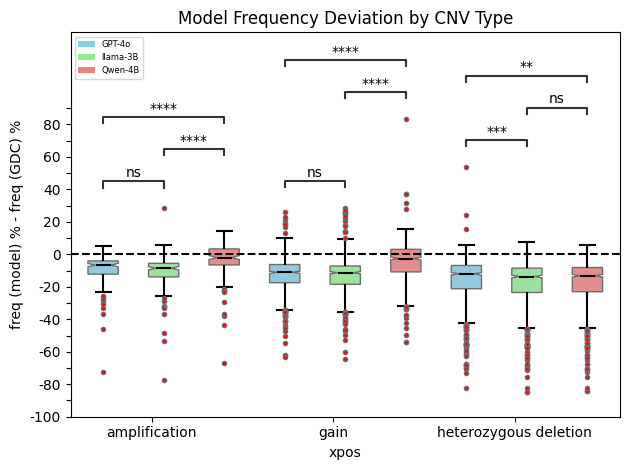

In [47]:
# Plot
fig, ax = plt.subplots()

flier_props = dict(marker='o', markerfacecolor='red', markersize=3, linestyle='none')

palette = {
    'GPT-4o': 'skyblue',
    'llama-3B': 'lightgreen',
    'Qwen-4B': 'lightcoral'
}
# positions_gpt4, positions_llama, positions_qwen
# (array([0, 3, 6]), array([0.8, 3.8, 6.8]), array([1.6, 4.6, 7.6]))
positions_map = {
    'amplification_GPT-4o': 0,
    'gain_GPT-4o': 3,
    'heterozygous deletion_GPT-4o': 6,
    'amplification_llama-3B': 0.8,
    'gain_llama-3B': 3.8,
    'heterozygous deletion_llama-3B': 6.8,
    'amplification_Qwen-4B': 1.6,
    'gain_Qwen-4B': 4.6,
    'heterozygous deletion_Qwen-4B': 7.6
}

def numeric_category(x):
    k = '_'.join([x['cnv_type'], x['model']])
    return positions_map[k]


all_cnv_data['xpos'] = all_cnv_data.apply(
    lambda x: numeric_category(x), axis = 1
)
sns.boxplot(data=all_cnv_data, x='xpos', y='delta', hue='model', notch=True, flierprops=flier_props, palette=palette, width=0.5)

# Access the box patches and modify
for patch in ax.artists:
    patch.set_edgecolor('black')
    patch.set_linewidth(2.5)

# Customize boxplot lines (whiskers, medians, caps)
for line in ax.lines:
    line.set_color('black')
    line.set_linewidth(1.5)

# Y-axis tick formatting
yticks = np.arange(-100, 100, 10)
ax.set_yticks(yticks)
ax.set_yticklabels([str(t) if t % 20 == 0 else '' for t in yticks])

group_xticks = [0.8, 3.8, 6.8]
group_labels = ['amplification', 'gain', 'heterozygous deletion']
ax.set_xticks(group_xticks)
ax.set_xticklabels(group_labels)

# Add significance with statannotations
annotator_pairs = [
    (positions_map['gain_GPT-4o'], positions_map['gain_llama-3B']),
    (positions_map['gain_GPT-4o'], positions_map['gain_Qwen-4B']),
    (positions_map['gain_llama-3B'], positions_map['gain_Qwen-4B']),
    
    (positions_map['amplification_GPT-4o'], positions_map['amplification_llama-3B']),
    (positions_map['amplification_GPT-4o'], positions_map['amplification_Qwen-4B']),
    (positions_map['amplification_llama-3B'], positions_map['amplification_Qwen-4B']),

    (positions_map['heterozygous deletion_GPT-4o'], positions_map['heterozygous deletion_llama-3B']),
    (positions_map['heterozygous deletion_GPT-4o'], positions_map['heterozygous deletion_Qwen-4B']),
    (positions_map['heterozygous deletion_llama-3B'], positions_map['heterozygous deletion_Qwen-4B']),
]
annotator = Annotator(ax, annotator_pairs, data=all_cnv_data, x='xpos', y='delta')
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()


plt.axhline(0, linestyle='--', color='black')
plt.ylabel("freq (model) % - freq (GDC) %")
plt.title("Model Frequency Deviation by CNV Type")
ax.legend(handles=legend_elements, loc='best', fontsize=6)
plt.tight_layout()
plt.show()

### matplotlib plot with p-values

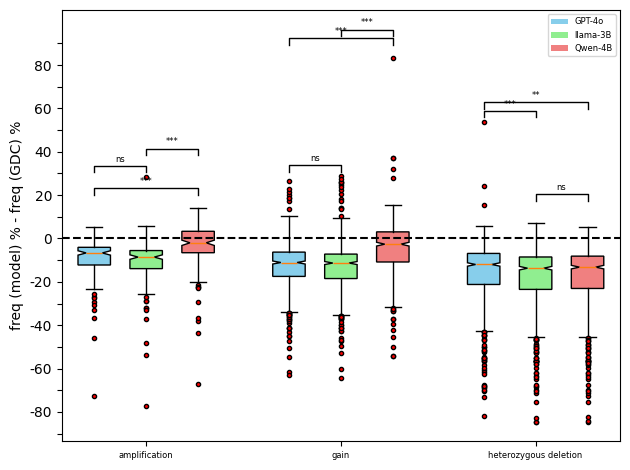

In [48]:
# spacing parameters
line_height = 3  # height of the vertical brackets
text_offset = 1  # how much higher the star goes above the bracket

from matplotlib.patches import Patch
from scipy.stats import ttest_ind

fig, ax = plt.subplots()
flier_props = dict(marker='o', markerfacecolor='red', markersize=3, linestyle='none')

# Clean NA
gpt4_cnv = gpt4_cnv[gpt4_cnv['cnv_type'] != 'NA']
llama_cnv = llama_cnv[llama_cnv['cnv_type'] != 'NA']
qwen_cnv = qwen_cnv[qwen_cnv['cnv_type'] != 'NA']

# Group data
grouped_gpt4_data = gpt4_cnv.groupby('cnv_type')['delta_gpt4'].apply(list)
grouped_llama_data = llama_cnv.groupby('cnv_type')['delta_llama'].apply(list)
grouped_qwen_data = qwen_cnv.groupby('cnv_type')['delta_qwen'].apply(list)

n = len(grouped_gpt4_data)
xlabels = list(grouped_gpt4_data.groupby('cnv_type').groups.keys())
positions_gpt4 = np.arange(n) * 3
positions_llama = positions_gpt4 + 0.8
positions_qwen = positions_llama + 0.8

# Plot boxplots
ax.boxplot(grouped_gpt4_data, positions=positions_gpt4, notch=True, flierprops=flier_props,
           patch_artist=True, boxprops=dict(facecolor='skyblue'))
ax.boxplot(grouped_llama_data, positions=positions_llama, notch=True, flierprops=flier_props,
           patch_artist=True, boxprops=dict(facecolor='lightgreen'))
ax.boxplot(grouped_qwen_data, positions=positions_qwen, notch=True, flierprops=flier_props,
           patch_artist=True, boxprops=dict(facecolor='lightcoral'))

# Axis labels
all_positions = (positions_gpt4 + positions_llama + positions_qwen) / 3
ax.set_xticks(all_positions)
ax.set_xticklabels(xlabels, fontsize=6)

yticks = np.arange(-100, 100, 10)
ax.set_yticks(yticks)
ax.set_yticklabels([str(t) if t % 20 == 0 else '' for t in yticks])
ax.set_ylabel('freq (model) % - freq (GDC) %')
ax.axhline(y=0, color='black', linestyle='--')

# Add significance stars inside plot
for i, cnv_type in enumerate(xlabels):
    gpt_vals = grouped_gpt4_data[cnv_type]
    llama_vals = grouped_llama_data[cnv_type]
    qwen_vals = grouped_qwen_data[cnv_type]

    # Compare GPT-4o vs LLaMA
    stat, p = ttest_ind(gpt_vals, llama_vals, equal_var=False)
    if p < 0.001:
        sig = '***'
    elif p < 0.01:
        sig = '**'
    elif p < 0.05:
        sig = '*'
    else:
        sig = 'ns'
    y = max(max(gpt_vals), max(llama_vals)) + 2
    x1, x2 = positions_gpt4[i], positions_llama[i]
    ax.plot([x1, x1, x2, x2], [y, y + line_height, y + line_height, y], color='black', lw=1)
    ax.text((x1 + x2) / 2, y + line_height + text_offset, sig, ha='center', va='bottom', fontsize=6)

    # Compare GPT-4o vs Qwen
    stat, p = ttest_ind(gpt_vals, qwen_vals, equal_var=False)
    sig = '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else 'ns'
    y = max(max(gpt_vals), max(qwen_vals)) + 6
    x1, x2 = positions_gpt4[i], positions_qwen[i]
    ax.plot([x1, x1, x2, x2], [y, y + line_height, y + line_height, y], color='black', lw=1)
    ax.text((x1 + x2) / 2, y + line_height + text_offset, sig, ha='center', va='bottom', fontsize=6)
    

    # Compare LLaMA vs Qwen
    stat, p = ttest_ind(llama_vals, qwen_vals, equal_var=False)
    sig = '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else 'ns'
    y = max(max(llama_vals), max(qwen_vals)) + 10
    x1, x2 = positions_llama[i], positions_qwen[i]
    ax.plot([x1, x1, x2, x2], [y, y + line_height, y + line_height, y], color='black', lw=1)
    ax.text((x1 + x2) / 2, y + line_height + text_offset, sig, ha='center', va='bottom', fontsize=6)


# Legend
legend_elements = [
    Patch(facecolor='skyblue', label='GPT-4o'),
    Patch(facecolor='lightgreen', label='llama-3B'),
    Patch(facecolor='lightcoral', label='Qwen-4B'),
]
ax.legend(handles=legend_elements, loc='best', fontsize=6)

plt.tight_layout()
plt.title('')
plt.savefig('../figs/Fig3.png', bbox_inches='tight')